In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Parte 1

## 1. Genere un conjunto de datos utilizando la función make_classification de sklearn

In [2]:
X, y = make_classification(n_samples=100,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            random_state=0)

## 2. Usamos dos características para que podamos visualizar nuestros datos

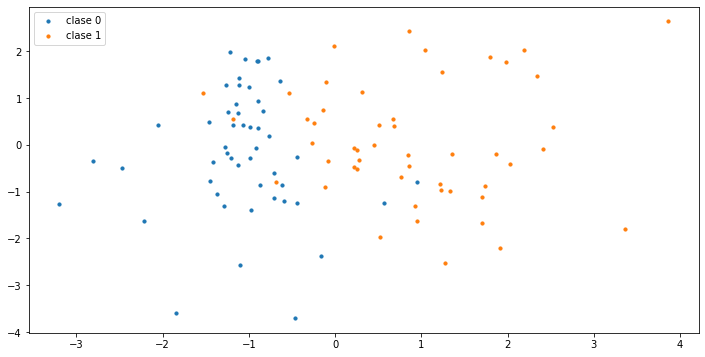

In [3]:
d = {'feature1': X[:,0], 'feature2': X[:,1],'y':y}
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(12, 6))
clase0 = df.loc[y == 0]
clase1 = df.loc[y == 1]
plt.scatter(clase0.iloc[:, 0], clase0.iloc[:, 1], s=10, label='clase 0')
plt.scatter(clase1.iloc[:, 0], clase1.iloc[:, 1], s=10, label='clase 1')
plt.legend()
plt.show()

## 3. Con solo echar un vistazo, haga una estimación para un límite de decisión de la forma x_2 = m*x_1 + b.

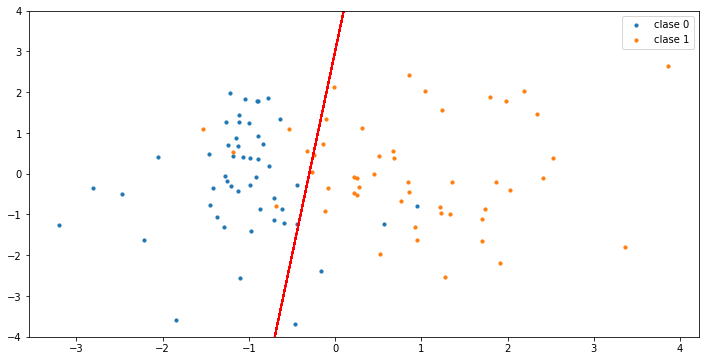

In [4]:
#X_2 = m X_1 + b, m=10, b=3
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(clase0.iloc[:, 0], clase0.iloc[:, 1], s=10, label='clase 0')
plt.scatter(clase1.iloc[:, 0], clase1.iloc[:, 1], s=10, label='clase 1')
plt.plot(X[:,0], 10*X[:,0] + 3,c='red')
plt.ylim([-4, 4])
plt.legend()
plt.show()

# Parte 2

## 1. dataframe de los datos

In [5]:
df

,feature1,feature2,y
0,-0.766055,0.183325,0
1,-0.920383,-0.072317,0
2,-0.986585,-0.286920,0
3,1.709102,-1.104540,1
4,1.987647,1.776245,1
...,...,...,...
95,-0.989449,0.373436,0
96,-0.869385,-0.860700,0
97,2.530269,0.380252,1
98,-0.461220,-3.697436,0


## 1.1 calcular la función de costo

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_ = np.c_[np.ones((X.shape[0], 1)), X]
y_ = y[:, np.newaxis]
betha = np.array([[0.],[1.],[1.]])

<ipython-input-7-0ee2406344fa>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_ = y[:, np.newaxis]


In [8]:
def sigmoid(x):
    # función de activación
    return 1 / (1 + np.exp(-x))

def dot_product(betha, x):
    # calcula el producto punto
    return np.dot(x, betha)

def hypothesis_function(betha, x):
    # calcula la función de hipótesis
    return sigmoid(dot_product(betha, x))

def cost_function(betha, x, y):
    # calcula la función costo
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(hypothesis_function(betha, x)) + (1 - y) * np.log(
            1 - hypothesis_function(betha, x)))
    return total_cost

def gradient(betha, x, y):
    # calcular el gradiente de la función costo
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(dot_product(betha,   x)) - y)

In [9]:
cost_function(betha, X_, y_)

0.4696083611230562

## 1.2 gradiente de la función de costo

In [10]:
gradient(betha, X_, y_)

array([[-0.03064086],
       [-0.22123091],
       [ 0.1879387 ]])

## 2. implemente las funciones predict_proba y predict en  logistic_regression_functions.py

In [11]:
from logistic_regression_functions import *

In [12]:
cost(X_, y_,betha)

0.4696083611230562

In [13]:
gradient(X_, y_, betha)

array([[-0.03064086],
       [-0.22123091],
       [ 0.1879387 ]])

In [14]:
X_tmp = np.array([[0, 1], [2, 2], [3, 0]])
y_tmp = np.array([1, 0, 0])
coeffs = np.array([1, 1])
cost(X_tmp, y_tmp, coeffs)

2.4599996556699257

# Parte 3

## 1. Importar GradientDescent

In [15]:
import logistic_regression_functions as f
from GradientDescent import GradientDescent

gd = GradientDescent(f.cost, f.gradient, f.predict)
gd.fit(X_, y_)
print("coeffs:", gd.coeffs) 
predictions = gd.predict(X_)

coeffs: [[0.0051898 ]
 [0.39944351]
 [0.04227248]]


In [16]:
from sklearn.metrics import accuracy_score
print('accuracy=',accuracy_score(y_[:,0],predictions[:,0]))

accuracy= 0.88
